In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import datetime
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind,stats

In [2]:
transactionData = pd.read_excel('QVI_transaction_data.xlsx')

In [3]:
customerData = pd.read_csv('QVI_purchase_behaviour.csv')

In [4]:
transactionData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [5]:
transactionData.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [6]:
# Converting the date column to date format
transactionData['DATE'] = pd.to_datetime(transactionData['DATE'], unit='D', origin='1899-12-30')
transactionData.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [7]:
transactionData.groupby('PROD_NAME').size().reset_index(name='count')

,PROD_NAME,count
0,Burger Rings 220g,1564
1,CCs Nacho Cheese 175g,1498
2,CCs Original 175g,1514
3,CCs Tasty Cheese 175g,1539
4,Cheetos Chs & Bacon Balls 190g,1479
...,...,...
109,WW Sour Cream &OnionStacked Chips 160g,1483
110,WW Supreme Cheese Corn Chips 200g,1509
111,Woolworths Cheese Rings 190g,1516
112,Woolworths Medium Salsa 300g,1430


In [8]:
# Text analysis 
productWords = pd.DataFrame({'words': pd.Series(list(set(' '.join(transactionData['PROD_NAME']).split())))})

In [9]:
# product[~product['word'].str.contains('\d')]
productWords = productWords[~productWords['words'].str.contains('\\d')]

In [10]:
productWords = productWords[productWords['words'].map(lambda x: bool(re.match('[a-zA-Z]+$', x)))].reset_index(drop=True)
productWords

,words
0,Vinegr
1,Vingar
2,Pesto
3,Tangy
4,Vinegar
...,...
163,Smiths
164,Red
165,Cobs
166,Pringles


In [11]:
productWords.groupby('words').size().reset_index(name='Count').sort_values(by='Count', ascending=False)

,words,Count
0,Aioli,1
115,SR,1
107,Puffs,1
108,RRD,1
109,Red,1
...,...,...
57,FriedChicken,1
58,Fries,1
59,Garden,1
60,Gcamole,1


In [12]:
transactionData.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [13]:
# we can observe from the above dataframe product quantaty has 200 let's check
transactionData[transactionData['PROD_QTY']==200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [14]:
# To check for the null values
transactionData.isna().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [15]:
transactionData[transactionData['LYLTY_CARD_NBR']==226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [16]:
# since the customer data is an outlier we will remove it
transactionData = transactionData[transactionData['LYLTY_CARD_NBR']!=226000]
transactionData.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264834.000000,2.648340e+05,2.648340e+05,264834.000000,264834.000000,264834.000000
mean,135.079423,1.355488e+05,1.351576e+05,56.583554,1.905813,7.299346
std,76.784063,8.057990e+04,7.813292e+04,32.826444,0.343436,2.527241
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.000000,7.002100e+04,6.760050e+04,28.000000,2.000000,5.400000
50%,130.000000,1.303570e+05,1.351365e+05,56.000000,2.000000,7.400000
75%,203.000000,2.030940e+05,2.026998e+05,85.000000,2.000000,9.200000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


In [17]:
transactionData.groupby('DATE').size().reset_index(name='Count')

,DATE,Count
0,2018-07-01,724
1,2018-07-02,711
2,2018-07-03,722
3,2018-07-04,714
4,2018-07-05,712
...,...,...
359,2019-06-26,723
360,2019-06-27,709
361,2019-06-28,730
362,2019-06-29,745


In [18]:
transactionData['DATE'].describe()

C:\Users\yogeswarvenkatsai\AppData\Local\Temp\ipykernel_6276\3048608153.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  transactionData['DATE'].describe()


count                  264834
unique                    364
top       2018-12-24 00:00:00
freq                      939
first     2018-07-01 00:00:00
last      2019-06-30 00:00:00
Name: DATE, dtype: object

In [19]:
# we can see that there are 364 days of data means still one day of data is
# missing in the dataset
#alldates = pd.DataFrame(transactionData['DATE'].sort_values(ascending=True))
#transactionData.groupby('DATE').size().reset_index(name='Ordered_Dates')

In [20]:
# we can find the missing value by ploting a graph 
# assgin all dates in a Dataframe
allDates = pd.date_range('2018-07-01','2019-06-30')
transactions_by_day = pd.DataFrame({'DATE':allDates})
# since the we have 364 values and let the missing value by 0 
# then on graph the missing values drops Suddenly so we can find the missing value
transactions_by_day = transactions_by_day.merge(transactionData.groupby('DATE').size().reset_index(name = 'No of transactions'),on='DATE',how='left')
transactions_by_day.fillna(0,inplace=True)

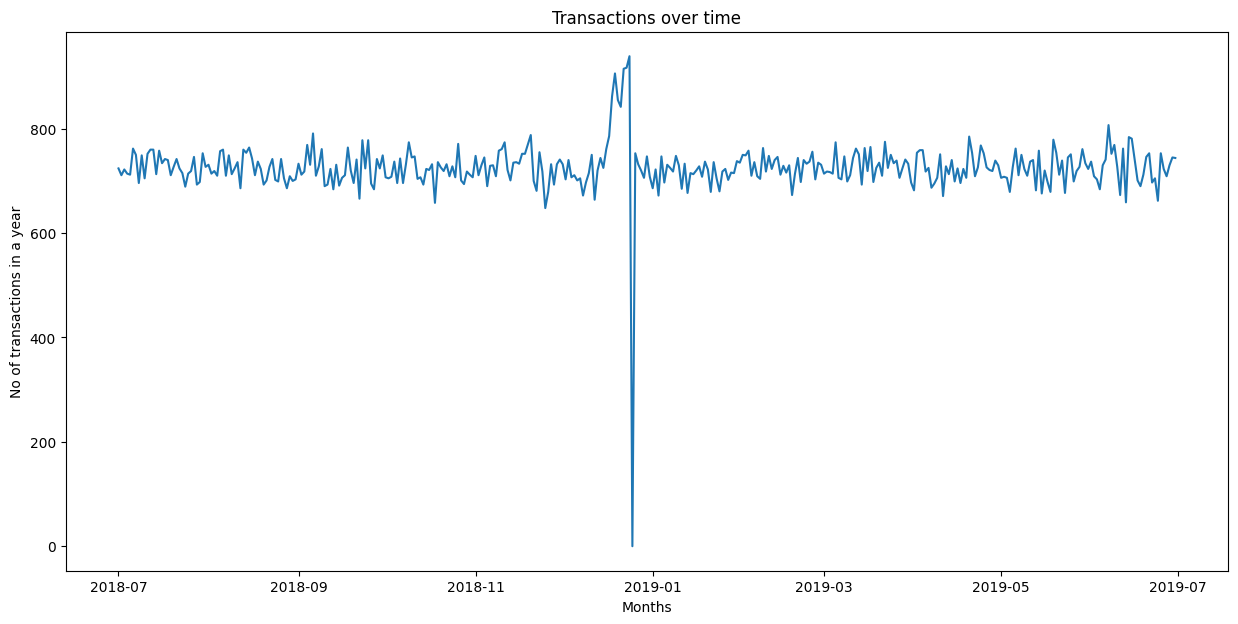

In [21]:
plt.figure(figsize=(15,7))
plt.plot(transactions_by_day['DATE'],transactions_by_day['No of transactions'],alpha=1)
plt.title('Transactions over time')
plt.xlabel('Months')
plt.ylabel('No of transactions in a year')
plt.show()

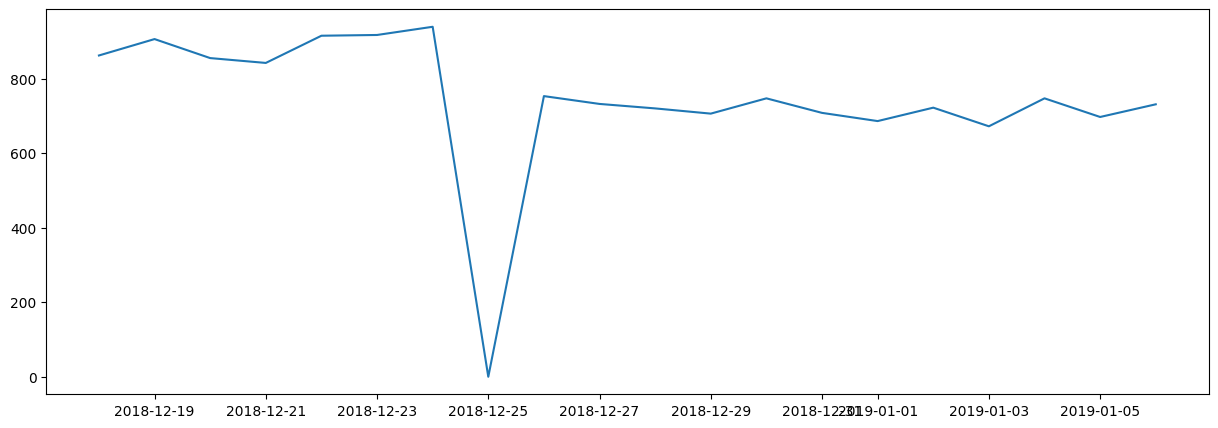

In [22]:
# we can observe that the break has occured at the dec to jan month lets examine them
plt.figure(figsize=(15,5))
# by trail and error method
plt.plot(transactions_by_day['DATE'][170:190],transactions_by_day['No of transactions'][170:190])

In [23]:
# we can see that the 25 Dec has the lowest and the missing data Since the shop's are closed 
# This make sense
transactionData['PACK_SIZE'] = transactionData['PROD_NAME'].apply(lambda x: float(re.findall('\d+', x)[0]))
transactionData.groupby('PACK_SIZE').size().reset_index(name='count').sort_values('PACK_SIZE')

,PACK_SIZE,count
0,70.0,1507
1,90.0,3008
2,110.0,22387
3,125.0,1454
4,134.0,25102
5,135.0,3257
6,150.0,43131
7,160.0,2970
8,165.0,15297
9,170.0,19983


In [24]:
# we can see that the highest pack size is 380 and lowest is  70
transactionData.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0


In [25]:
transactionData['PACK_SIZE'].value_counts()

175.0    66390
150.0    43131
134.0    25102
110.0    22387
170.0    19983
165.0    15297
300.0    15166
330.0    12540
380.0     6416
270.0     6285
210.0     6272
200.0     4473
135.0     3257
250.0     3169
90.0      3008
190.0     2995
160.0     2970
220.0     1564
70.0      1507
180.0     1468
125.0     1454
Name: PACK_SIZE, dtype: int64

Text(0, 0.5, 'Frequency')

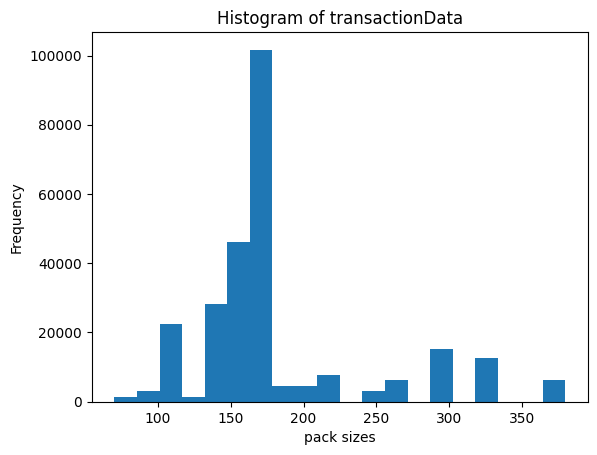

In [26]:
plt.hist(transactionData['PACK_SIZE'],bins=20)
plt.title('Histogram of transactionData')
plt.xlabel('pack sizes')
plt.ylabel('Frequency')

In [27]:
# Extracting the brand names from the product names
transactionData['BRAND_NAME']=transactionData['PROD_NAME'].str.split().str[0].str.upper()
transactionData['BRAND_NAME'].value_counts()

KETTLE        41288
SMITHS        28860
PRINGLES      25102
DORITOS       24962
THINS         14075
RRD           11894
INFUZIONS     11057
WW            10320
COBS           9693
TOSTITOS       9471
TWISTIES       9454
OLD            9324
TYRRELLS       6442
GRAIN          6272
NATURAL        6050
RED            5885
CHEEZELS       4603
CCS            4551
WOOLWORTHS     4437
DORITO         3183
INFZNS         3144
SMITH          2963
CHEETOS        2927
SNBTS          1576
BURGER         1564
GRNWVES        1468
SUNBITES       1432
NCC            1419
FRENCH         1418
Name: BRAND_NAME, dtype: int64

In [28]:
customerData.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [29]:
customerData['LIFESTAGE'].value_counts()

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

In [30]:
customerData['PREMIUM_CUSTOMER'].value_counts()

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

In [31]:
customerData.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [32]:
# lets check for the null values
customerData.isna().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [33]:
# since there are no null values lets mearge the datasets
data = pd.merge(transactionData,customerData ,how='left',on='LYLTY_CARD_NBR')
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCS,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,SMITHS,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,SMITHS,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,KETTLE,MIDAGE SINGLES/COUPLES,Budget


In [34]:
# lets check if there are any duplicates or not
data.shape,data.drop_duplicates().shape

((264834, 12), (264833, 12))

In [35]:
# we can see that only one duplicate data is there 
# lets check all the values are matched or not
data.isna().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND_NAME          0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [36]:
# all the values are matched in the dataset
data.to_csv('cleaned_dataset.csv')

In [37]:
sales = data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index(name='Sum')
sales.head()

,LIFESTAGE,PREMIUM_CUSTOMER,Sum
0,MIDAGE SINGLES/COUPLES,Budget,35514.80
1,MIDAGE SINGLES/COUPLES,Mainstream,90803.85
2,MIDAGE SINGLES/COUPLES,Premium,58432.65
3,NEW FAMILIES,Budget,21928.45
4,NEW FAMILIES,Mainstream,17013.90


Text(0.5, 1.0, 'Proportion of sales by lifestage and premium customer')

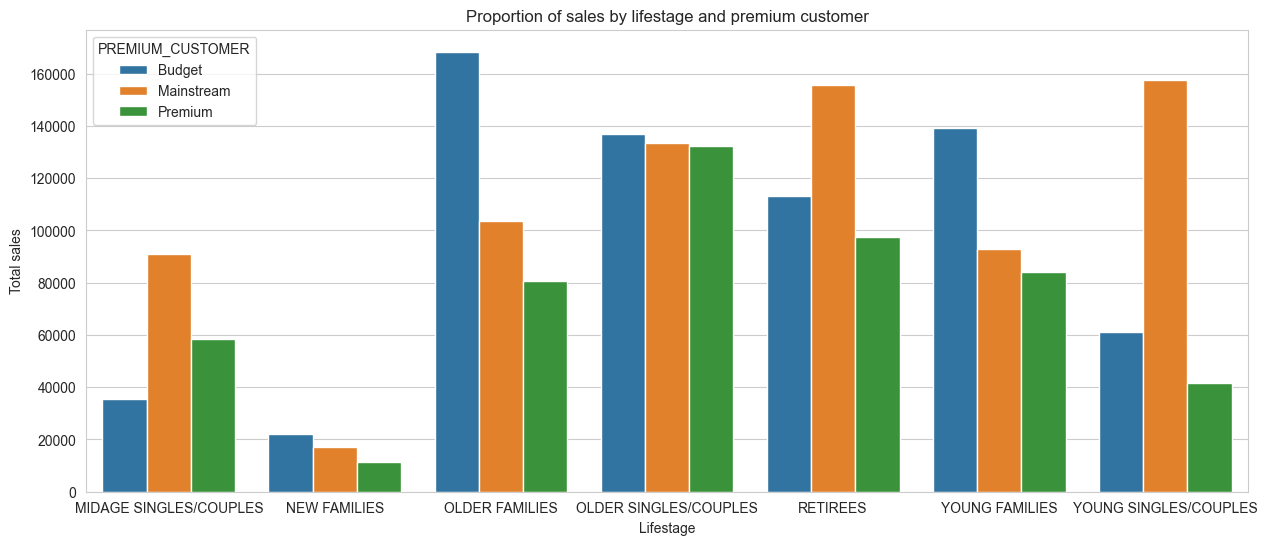

In [38]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x="LIFESTAGE", y="Sum", hue="PREMIUM_CUSTOMER", data=sales, ax=ax)
ax.set_xlabel("Lifestage")
ax.set_ylabel("Total sales")
ax.set_title("Proportion of sales by lifestage and premium customer")

<AxesSubplot:xlabel='LIFESTAGE'>

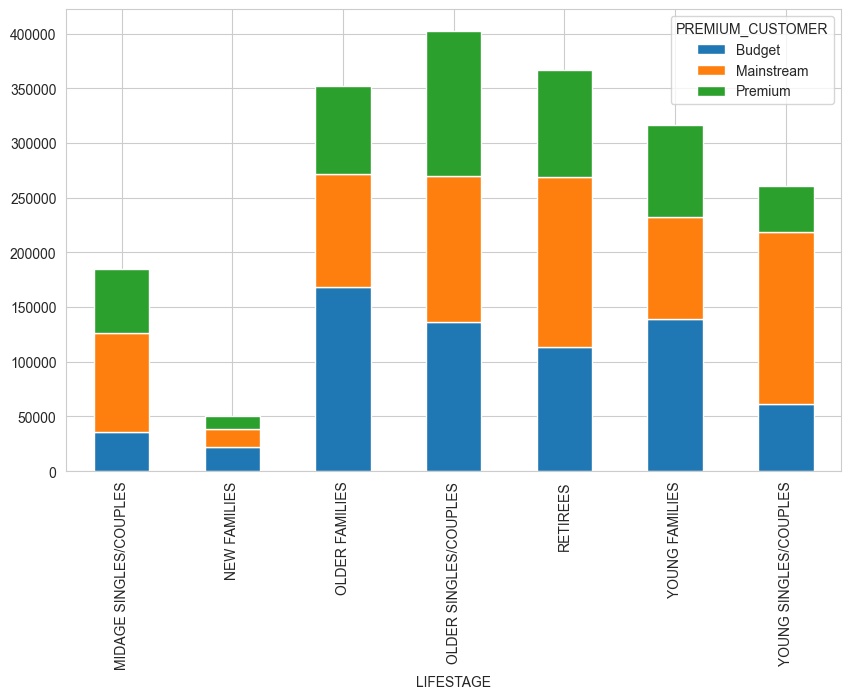

In [39]:
sales_pivot = sales.pivot(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='Sum')

# plot a stacked bar chart
sales_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))

In [40]:
customers = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index().rename(columns={'LYLTY_CARD_NBR': 'CUSTOMERS'}).sort_values('CUSTOMERS',ascending=True)
customers

,LIFESTAGE,PREMIUM_CUSTOMER,CUSTOMERS
5,NEW FAMILIES,Premium,588
4,NEW FAMILIES,Mainstream,849
3,NEW FAMILIES,Budget,1112
0,MIDAGE SINGLES/COUPLES,Budget,1504
8,OLDER FAMILIES,Premium,2273
2,MIDAGE SINGLES/COUPLES,Premium,2431
17,YOUNG FAMILIES,Premium,2433
20,YOUNG SINGLES/COUPLES,Premium,2574
16,YOUNG FAMILIES,Mainstream,2728
7,OLDER FAMILIES,Mainstream,2831


                LIFESTAGE PREMIUM_CUSTOMER  CUSTOMERS  PROPORTION
5            NEW FAMILIES          Premium        588    0.809516
4            NEW FAMILIES       Mainstream        849    1.168842
3            NEW FAMILIES           Budget       1112    1.530921
0  MIDAGE SINGLES/COUPLES           Budget       1504    2.070599
8          OLDER FAMILIES          Premium       2273    3.129302


Text(0.5, 1.0, 'Proportion of customers by lifestage and premium customer')

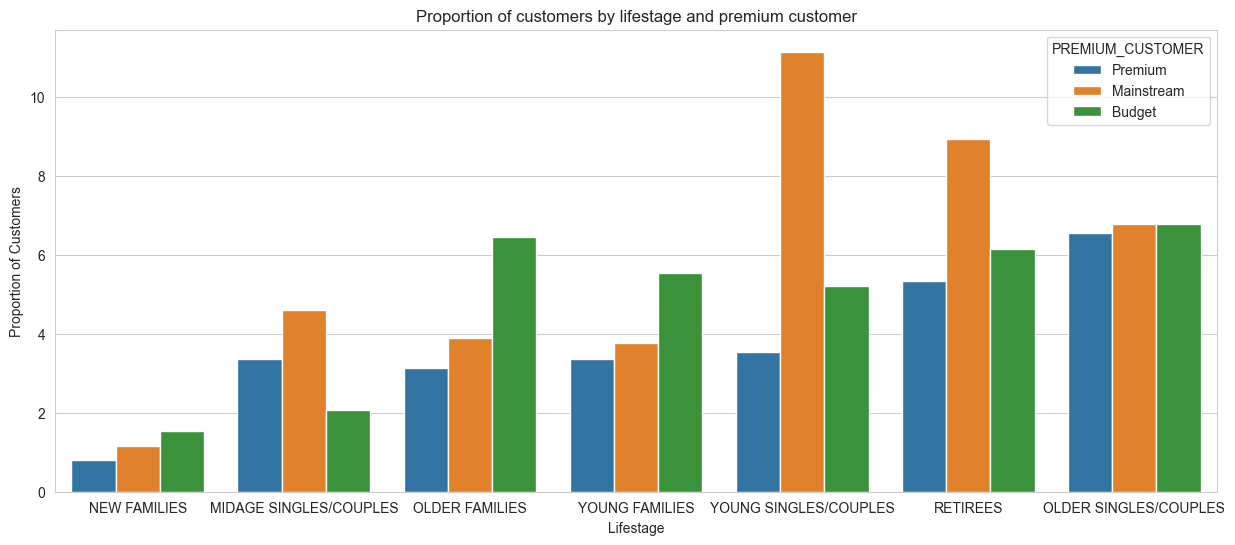

In [41]:
customers["PROPORTION"] = (customers["CUSTOMERS"] / customers["CUSTOMERS"].sum())*100
print(customers.head())
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x="LIFESTAGE", y="PROPORTION", hue="PREMIUM_CUSTOMER", data=customers)
ax.set_xlabel('Lifestage')
ax.set_ylabel('Proportion of Customers')
ax.set_title('Proportion of customers by lifestage and premium customer')


In [42]:
# to calculate the no of customers in each group and no of products  
avg_units = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'], as_index=False)['PROD_QTY', 'LYLTY_CARD_NBR'].agg({'PROD_QTY': 'sum', 'LYLTY_CARD_NBR': 'nunique'})
avg_units['AVG'] = avg_units['PROD_QTY'] / avg_units['LYLTY_CARD_NBR']
avg_units = avg_units.sort_values('AVG', ascending=False)
avg_units

C:\Users\yogeswarvenkatsai\AppData\Local\Temp\ipykernel_6276\1924969928.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_units = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'], as_index=False)['PROD_QTY', 'LYLTY_CARD_NBR'].agg({'PROD_QTY': 'sum', 'LYLTY_CARD_NBR': 'nunique'})


,LIFESTAGE,PREMIUM_CUSTOMER,PROD_QTY,LYLTY_CARD_NBR,AVG
7,OLDER FAMILIES,Mainstream,27756,2831,9.804309
6,OLDER FAMILIES,Budget,45065,4675,9.639572
8,OLDER FAMILIES,Premium,21771,2273,9.578091
15,YOUNG FAMILIES,Budget,37111,4017,9.238486
17,YOUNG FAMILIES,Premium,22406,2433,9.209207
16,YOUNG FAMILIES,Mainstream,25044,2728,9.180352
11,OLDER SINGLES/COUPLES,Premium,33986,4750,7.154947
9,OLDER SINGLES/COUPLES,Budget,35220,4929,7.145466
10,OLDER SINGLES/COUPLES,Mainstream,34997,4930,7.098783
1,MIDAGE SINGLES/COUPLES,Mainstream,22699,3340,6.796108


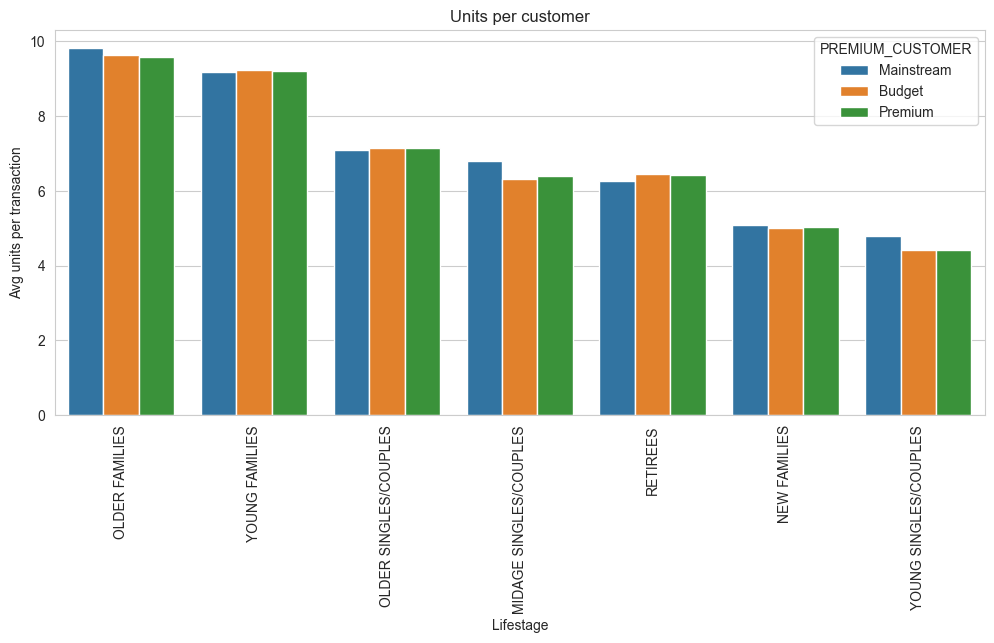

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
sns.barplot(data=avg_units, x='LIFESTAGE', y='AVG', hue='PREMIUM_CUSTOMER')
plt.xticks(rotation=90)
plt.xlabel('Lifestage')
plt.ylabel('Avg units per transaction')
plt.title('Units per customer')
plt.show()


In [44]:
# we can see that younger and older famalies by more chips than a per person

In [45]:
avg_price = data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'],as_index=False)['PROD_QTY','TOT_SALES'].agg({'PROD_QTY':'sum','TOT_SALES':'sum'})
avg_price['PRICE']=avg_price['TOT_SALES']/avg_price['PROD_QTY']
avg_price = avg_price.sort_values('PRICE',ascending=False)
avg_price

C:\Users\yogeswarvenkatsai\AppData\Local\Temp\ipykernel_6276\3338230671.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_price = data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'],as_index=False)['PROD_QTY','TOT_SALES'].agg({'PROD_QTY':'sum','TOT_SALES':'sum'})


,LIFESTAGE,PREMIUM_CUSTOMER,PROD_QTY,TOT_SALES,PRICE
19,YOUNG SINGLES/COUPLES,Mainstream,38632,157621.60,4.080079
1,MIDAGE SINGLES/COUPLES,Mainstream,22699,90803.85,4.000346
4,NEW FAMILIES,Mainstream,4319,17013.90,3.939315
3,NEW FAMILIES,Budget,5571,21928.45,3.936178
12,RETIREES,Budget,28764,113147.80,3.933660
14,RETIREES,Premium,24884,97646.05,3.924050
11,OLDER SINGLES/COUPLES,Premium,33986,132263.15,3.891695
5,NEW FAMILIES,Premium,2957,11491.10,3.886067
9,OLDER SINGLES/COUPLES,Budget,35220,136769.80,3.883299
13,RETIREES,Mainstream,40518,155677.05,3.842170


Text(0.5, 1.0, 'PRICE PER CUSTOMER')

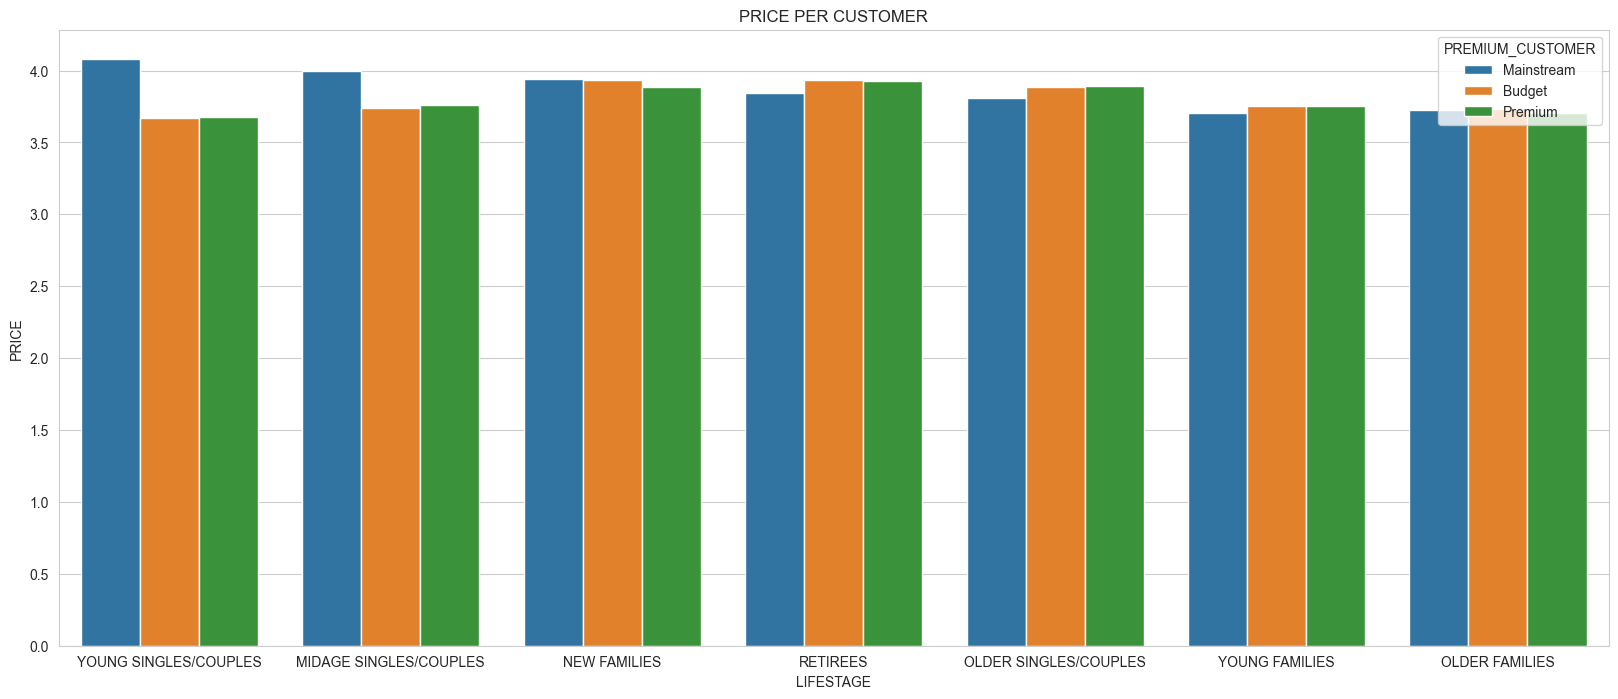

In [46]:
plt.figure(figsize=(20,8))
sns.barplot(x='LIFESTAGE',hue='PREMIUM_CUSTOMER',y='PRICE',data=avg_price)
plt.title('PRICE PER CUSTOMER')

In [47]:
# pric per unit
pricePerUnit = data.assign(price=data['TOT_SALES']/data['PROD_QTY'])
pricePerUnit

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER,price
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,NATURAL,YOUNG SINGLES/COUPLES,Premium,3.00
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCS,MIDAGE SINGLES/COUPLES,Budget,2.10
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,SMITHS,MIDAGE SINGLES/COUPLES,Budget,1.45
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,SMITHS,MIDAGE SINGLES/COUPLES,Budget,3.00
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,KETTLE,MIDAGE SINGLES/COUPLES,Budget,4.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175.0,KETTLE,YOUNG SINGLES/COUPLES,Premium,5.40
264830,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175.0,TOSTITOS,YOUNG SINGLES/COUPLES,Premium,4.40
264831,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170.0,DORITOS,YOUNG SINGLES/COUPLES,Premium,4.40
264832,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150.0,DORITOS,YOUNG SINGLES/COUPLES,Premium,3.90


In [48]:
# making the price in the main dataset
data['price'] = data['TOT_SALES'] / data['PROD_QTY']
mainstream = data[(data['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES'])) & (data['PREMIUM_CUSTOMER'] == 'Mainstream')]['price']
non_mainstream = data[(data['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES'])) & (data['PREMIUM_CUSTOMER'] != 'Mainstream')]['price']

ttest = ttest_ind(mainstream, non_mainstream, alternative='greater')

print(ttest)

Ttest_indResult(statistic=40.8341367879116, pvalue=0.0)


In [49]:
segment1 = data[(data['LIFESTAGE'] == "YOUNG SINGLES/COUPLES") & (data['PREMIUM_CUSTOMER'] == "Mainstream")]
others= data[~(data['LIFESTAGE'] == "YOUNG SINGLES/COUPLES") & (data['PREMIUM_CUSTOMER'] == "Mainstream")]

In [75]:
# lets find the brands affnity 
quantity_segment = segment1['PROD_QTY'].sum()
other_segment = others['PROD_QTY'].sum()
quantity_segment

38632

In [82]:
quantity_segment1_by_brand = segment1.groupby('BRAND_NAME')['PROD_QTY'].sum()
other_segment1_by_brand = others.groupby('BRAND_NAME')['PROD_QTY'].sum()